In [ ]:
!pip install google-colab-patches

ERROR: Could not find a version that satisfies the requirement google-colab-patches (from versions: none)
ERROR: No matching distribution found for google-colab-patches


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


def load_image(path):
    img = cv2.imread('/content/ss.png')
    return img

Original Image:


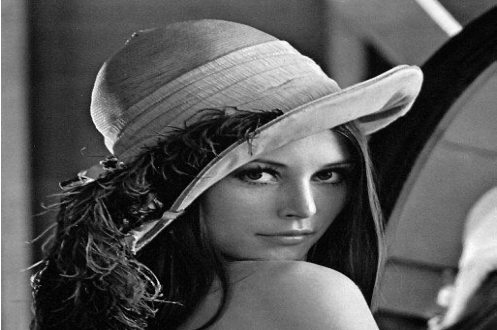

Resized Linear:


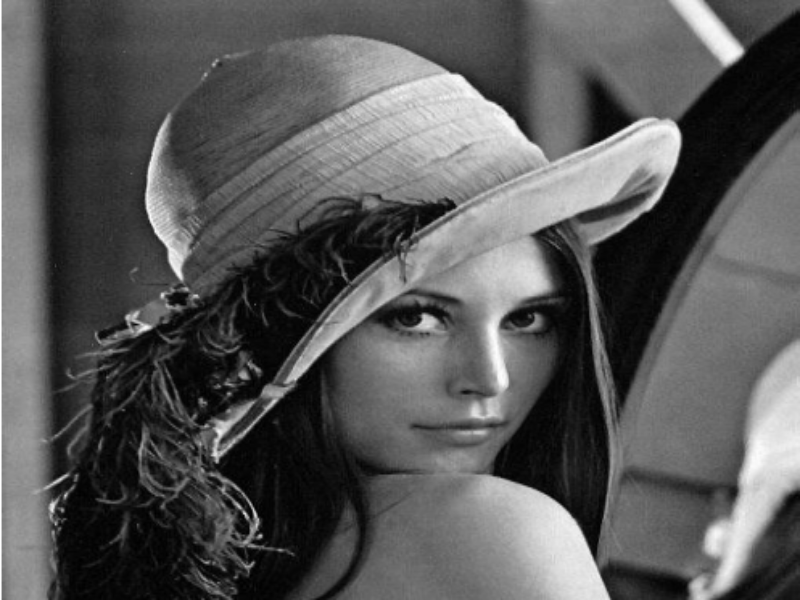

Resized Nearest:


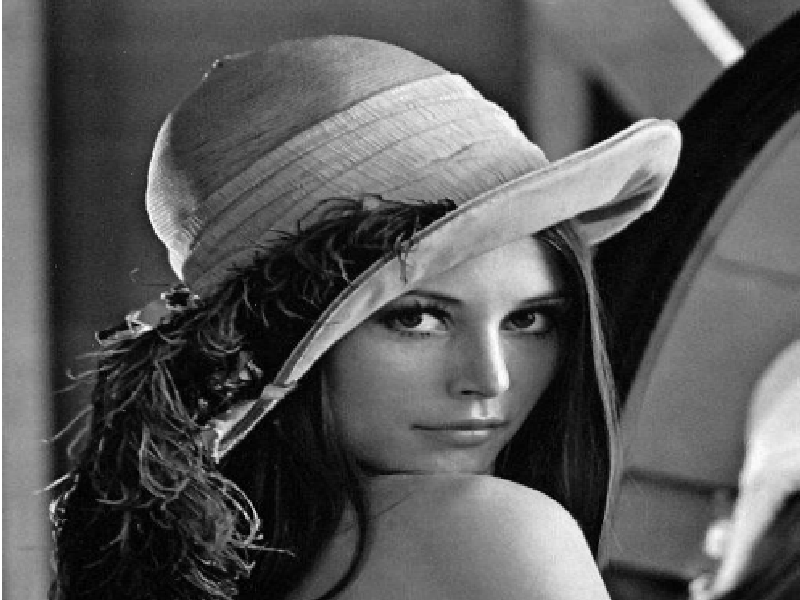

Resized Cubic:


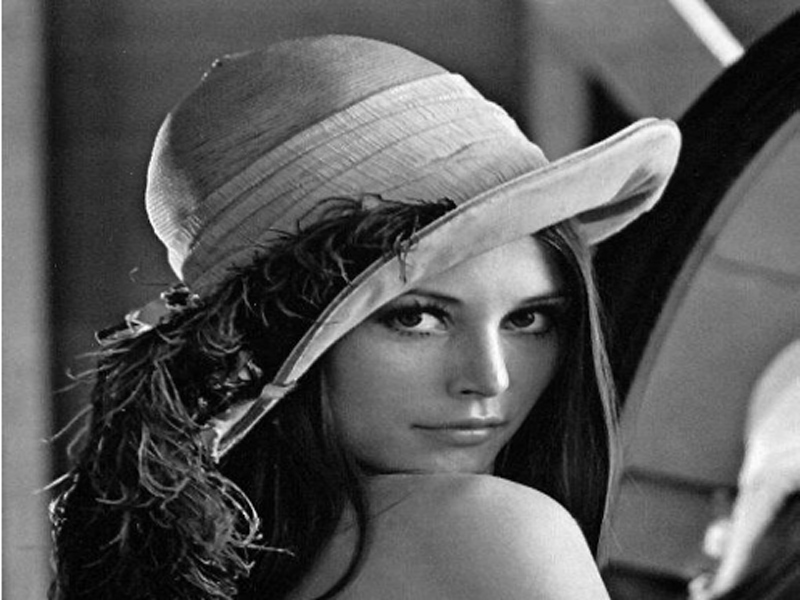

In [ ]:
# Linear interpolation
def resize_linear(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

# Nearest Neighbor
def resize_nearest(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

# Cubic interpolation
def resize_cubic(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)

if __name__ == "__main__":
  image = load_image("/content/ss.png")

  resized_linear = resize_linear(image, 800, 600)
  resized_nearest = resize_nearest(image, 800, 600)
  resized_cubic = resize_cubic(image, 800, 600)

    # Save or display results with labels
  print("Original Image:")
  cv2_imshow(image)
  print("Resized Linear:")
  cv2_imshow(resized_linear)
  print("Resized Nearest:")
  cv2_imshow(resized_nearest)
  print("Resized Cubic:")
  cv2_imshow(resized_cubic)

Original Image:


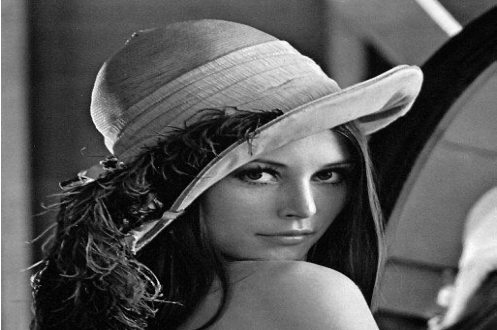

Blurred Box:


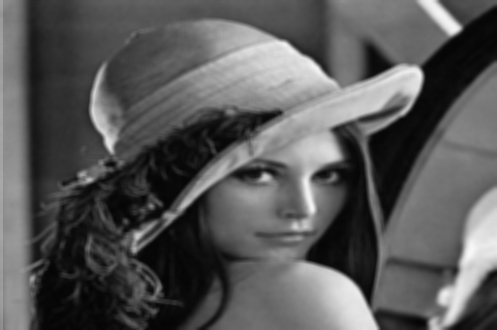

Blurred Gaussian:


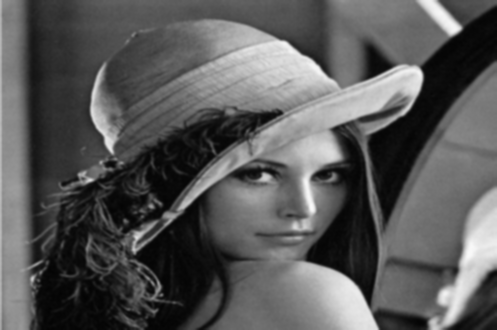

Blurred Median:


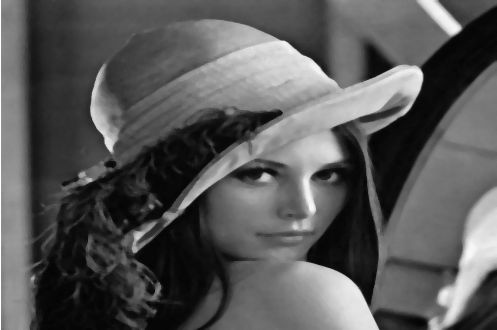

In [ ]:
# Box blur
def blur_box(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

# Gaussian blur
def blur_gaussian(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Median blur (good for salt-and-pepper noise)
def blur_median(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

if __name__ == "__main__":
    # Load image
    image = load_image("/content/ss.png")

        # Blur examples
    blurred_box = blur_box(image, 5)
    blurred_gaussian = blur_gaussian(image, 5)
    blurred_median = blur_median(image, 5)

    # Save or display results with labels
    print("Original Image:")
    cv2_imshow(image)
    print("Blurred Box:")
    cv2_imshow(blurred_box)
    print("Blurred Gaussian:")
    cv2_imshow(blurred_gaussian)
    print("Blurred Median:")
    cv2_imshow(blurred_median)





part 2


Evaluating Decision Tree...
Accuracy: 0.8250
Precision: 0.8241
Recall: 0.8250
F1-Score: 0.8237
Confusion Matrix:
 [[35  0  0  0  0  0  0  0  1  0]
 [ 0 26  2  1  1  0  1  1  4  0]
 [ 1  0 28  3  0  1  2  0  0  0]
 [ 0  0  2 30  0  1  1  1  0  2]
 [ 1  0  1  1 31  0  1  0  1  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 1  1  0  0  1  2 30  0  1  0]
 [ 0  1  1  0  2  0  0 31  0  1]
 [ 0  3  1  0  0  1  2  2 24  2]
 [ 0  0  1  3  0  0  0  2  3 27]]
AUC: 0.9024

Evaluating Artificial Neural Network...
Accuracy: 0.9778
Precision: 0.9787
Recall: 0.9778
F1-Score: 0.9778
Confusion Matrix:
 [[34  0  1  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  3  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  1  0 35]]
AUC: 0.9995


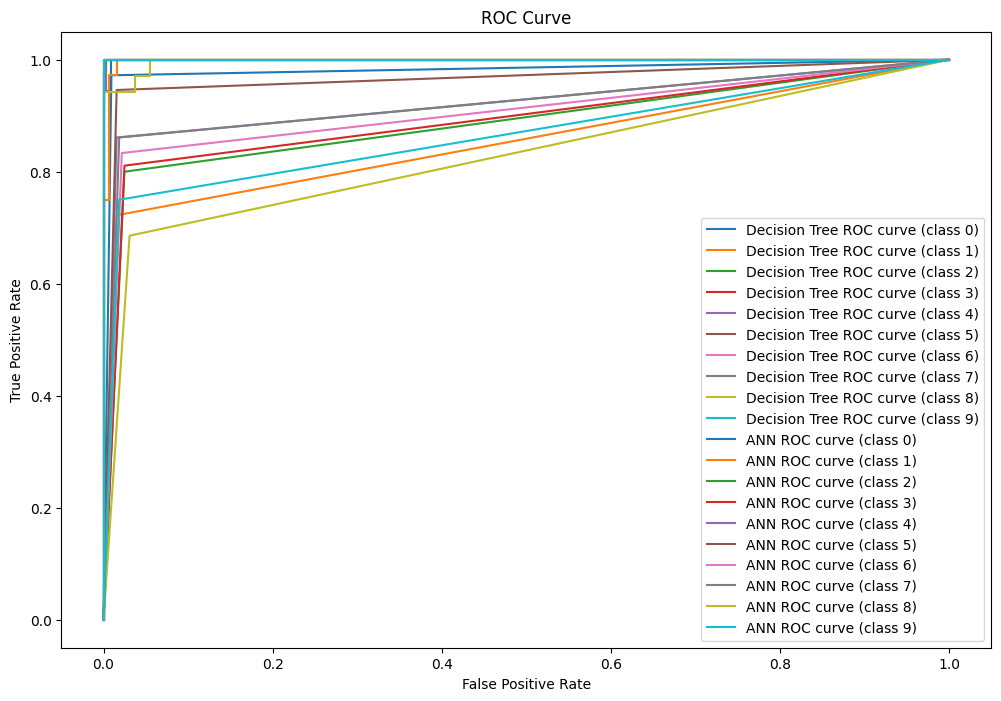

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the MNIST dataset (as sklearn's load_digits is similar to MNIST for demonstration purposes)
data = load_digits()
X = data.data
y = data.target

# Binarize the labels for multi-class ROC-AUC
n_classes = len(np.unique(y))
y_bin = label_binarize(y, classes=range(n_classes))

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Calculate ROC and AUC for multi-class
    y_prob = model.predict_proba(X_test)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

    # Average AUC
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    return accuracy, precision, recall, f1, cm, auc, fpr, tpr, roc_auc

# Evaluate Decision Tree
print("\nEvaluating Decision Tree...")
decision_tree = DecisionTreeClassifier(random_state=42)
dt_metrics = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
print(f"Accuracy: {dt_metrics[0]:.4f}")
print(f"Precision: {dt_metrics[1]:.4f}")
print(f"Recall: {dt_metrics[2]:.4f}")
print(f"F1-Score: {dt_metrics[3]:.4f}")
print("Confusion Matrix:\n", dt_metrics[4])
print(f"AUC: {dt_metrics[5]:.4f}")

# Evaluate ANN
print("\nEvaluating Artificial Neural Network...")
ann = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
ann_metrics = evaluate_model(ann, X_train, X_test, y_train, y_test)
print(f"Accuracy: {ann_metrics[0]:.4f}")
print(f"Precision: {ann_metrics[1]:.4f}")
print(f"Recall: {ann_metrics[2]:.4f}")
print(f"F1-Score: {ann_metrics[3]:.4f}")
print("Confusion Matrix:\n", ann_metrics[4])
print(f"AUC: {ann_metrics[5]:.4f}")

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(dt_metrics[6][i], dt_metrics[7][i], label=f'Decision Tree ROC curve (class {i})')
for i in range(n_classes):
    plt.plot(ann_metrics[6][i], ann_metrics[7][i], label=f'ANN ROC curve (class {i})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
